# Contents:
- Importing the pakages 
- Load the data files into dataframes
- Check for the data types, missing data
- Basic EDA

In [40]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as dates
from pandas.plotting import register_matplotlib_converters

In [ ]:
users = pd.read_csv('yammer_users.csv')
events1 = pd.read_csv('yammer_events_1.csv')
events2 = pd.read_csv('yammer_events_2.csv')
events = events1.append(events2, ignore_index =  True)
email_events = pd.read_csv('yammer_emails.csv')
#rollup = pd.read_csv('dimension_rollup_periods.csv')

In [3]:
print('users dataframe datatypes: \n', users.dtypes, '\n')
print('events dataframe datatypes: \n', events.dtypes, '\n')
print('email events dataframe datatypes: \n', email_events.dtypes, '\n')
#print('rollup dataframe datatypes: \n', rollup.dtypes, '\n')

In [4]:
users['created_at'] = pd.to_datetime(users['created_at'])
events['occurred_at'] = pd.to_datetime(events['occurred_at'])

Text(0, 0.5, '# of users')

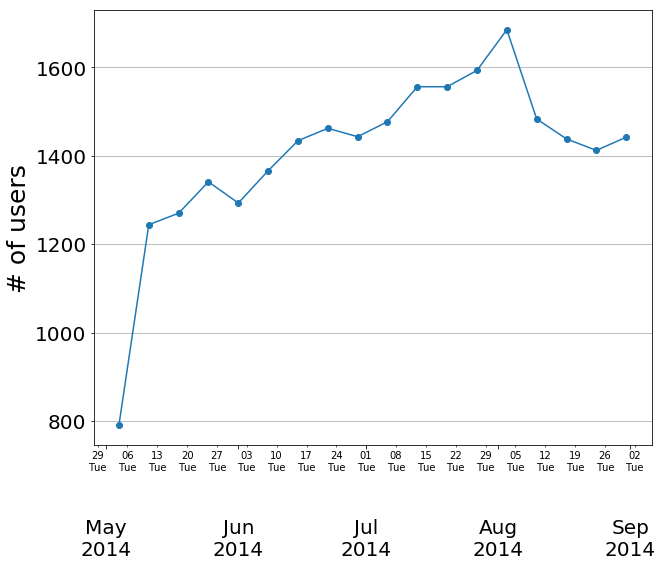

In [7]:
weekly_users = events.set_index('occurred_at')['user_id'].resample('1W').nunique()
fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}
ax.plot(weekly_users, 'o-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)

Text(0, 0.5, '# of users')

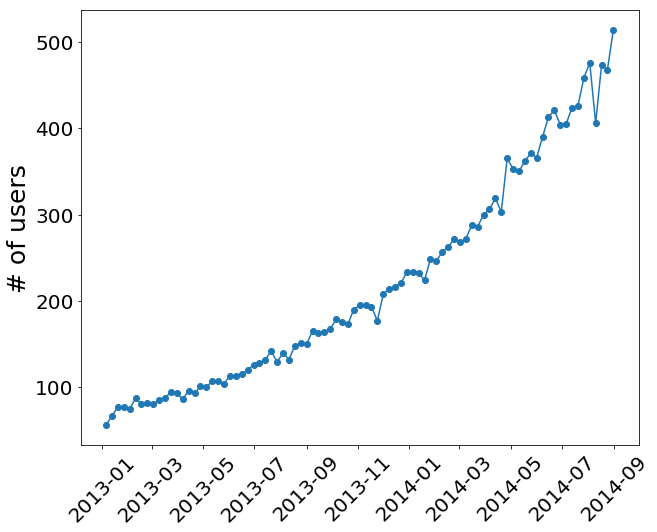

In [98]:
create_acc_users = users.set_index('created_at')['user_id'].resample('1W').nunique()

fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}
ax.plot(create_acc_users, 'o-')

ax.xaxis.set_tick_params(labelsize=20, rotation = 45)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)

In [67]:
event_type = list(events['event_type'].unique())

Text(0, 0.5, '# of users')

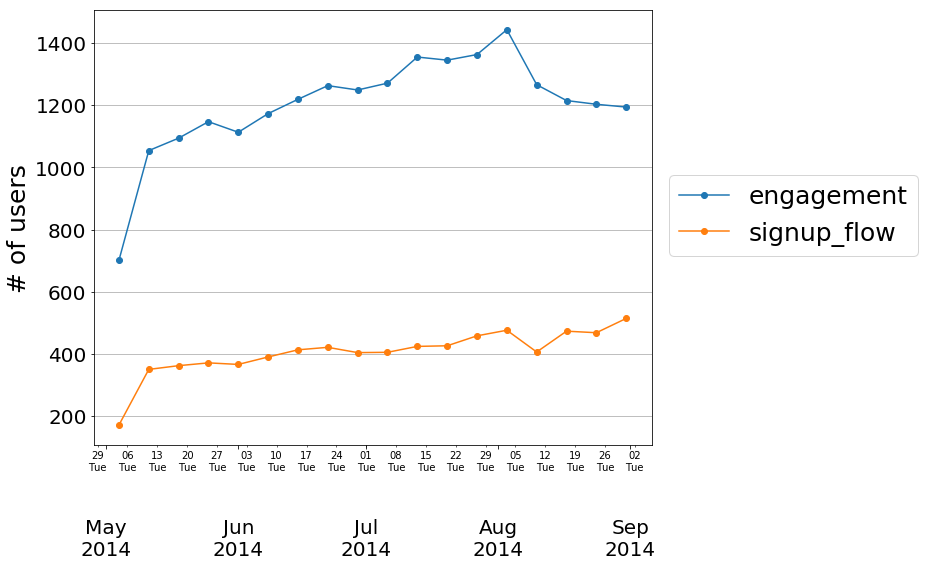

In [78]:
users_types_event = {}
for x in event_type:
    users_types_event[x] = events[events['event_type']
                    == x].set_index('occurred_at')['user_id'].resample('1W').nunique()
dev = iter(users_types_event)

fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}
#colors = iter(cm.prism(np.linspace(0, 1, len(devices))))

for k, v in users_types_event.items():
    ax.plot(v, 'o-', label = next(dev))
    
ax.legend(bbox_to_anchor=(1.5, 0.65), fontsize = 25)
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)

In [79]:
all_events = list(events['event_name'].unique())

Text(0, 0.5, '# of users')

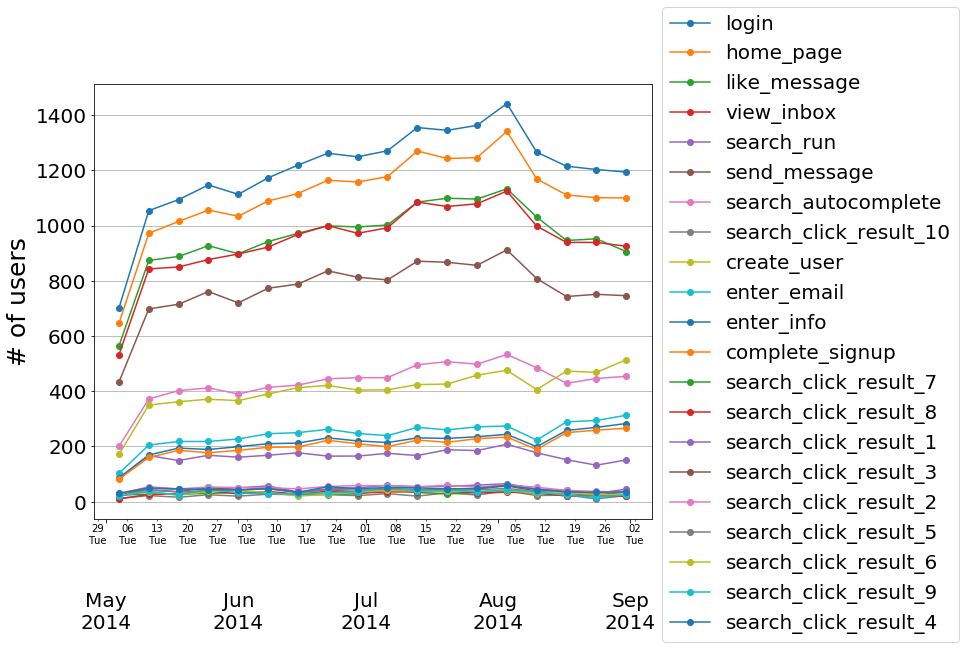

In [95]:
users_diff_event = {}
for x in all_events:
    users_diff_event[x] = events[events['event_name']
                    == x].set_index('occurred_at')['user_id'].resample('1W').nunique()
dev = iter(users_diff_event)



fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}


for k, v in users_diff_event.items():
    ax.plot(v, 'o-', label = next(dev))
    
ax.legend(bbox_to_anchor=(1, 1.2), fontsize = 20)
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)

In [110]:
few_events = all_events[6:]

Text(0, 0.5, '# of users')

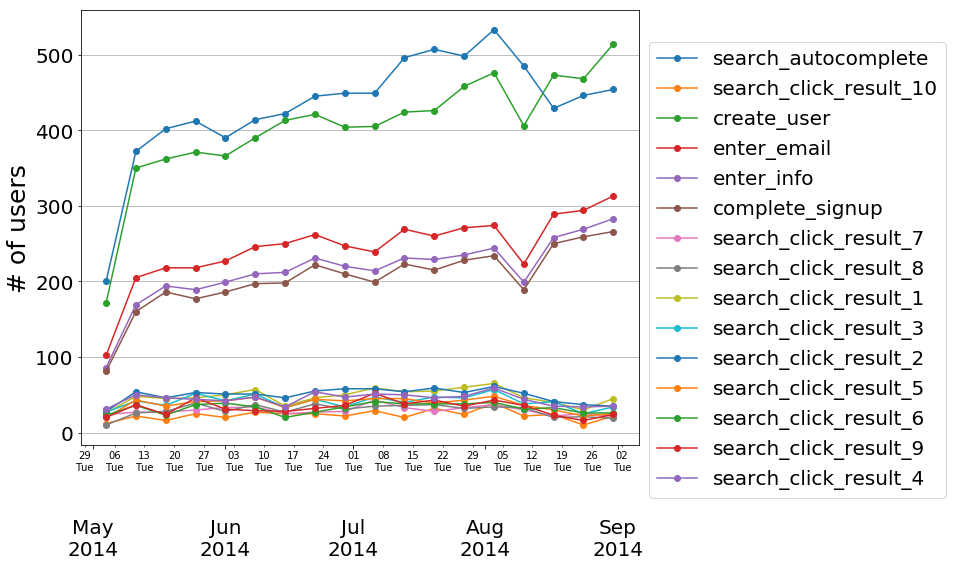

In [114]:
users_few_event = {}
for x in few_events:
    users_few_event[x] = events[events['event_name']
                    == x].set_index('occurred_at')['user_id'].resample('1W').nunique()
dev = iter(users_few_event)



fig, ax = plt.subplots(figsize = (10,8))
axis_tick_font = {'size':'20', 'color':'black'}


for k, v in users_few_event.items():
    ax.plot(v, 'o-', label = next(dev))
    
ax.legend(bbox_to_anchor=(1, 0.95), fontsize = 20)
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_ylabel('# of users', fontsize = 25)